<a href="https://colab.research.google.com/github/Arshiya-Begum30/FMML_Poject_and_labs/blob/main/Perceptron_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 1: Perceptron

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [33]:
banknote = datasets.fetch_openml(name='banknote-authentication', version=1, as_frame=True)
X = banknote.data
y = banknote.target.astype('int')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
def plot_learning_rate_experiment(learning_rates):
  plt.figure(figsize=(10, 6))
  for lr in learning_rates:
    clf = Perceptron(eta0=lr, max_iter=10, random_state=42)
    errors = []  # Track misclassifications during each iteration
    for _ in range(clf.max_iter):
      clf.partial_fit(X_train, y_train, classes=np.unique(y))
      y_pred = clf.predict(X_test)
      errors.append(np.sum(y_pred != y_test))
      accuracy = accuracy_score(y_test, y_pred)
      plt.plot(errors, label=f'LR={lr}, Acc={accuracy:.2f}')
      plt.title('Perceptron Learning Rate Experiment')
      plt.xlabel('Number of Iterations')
      plt.ylabel('Misclassifications')
      plt.legend()
      plt.show()

**Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?**

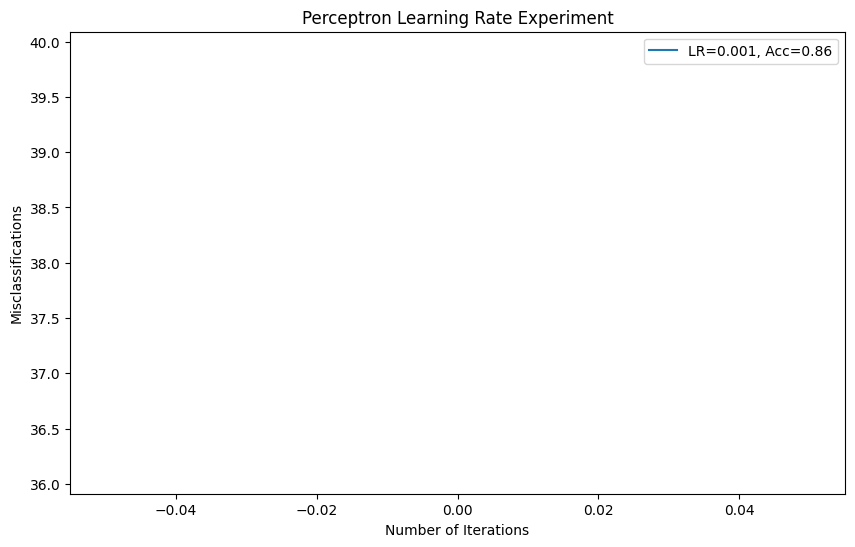

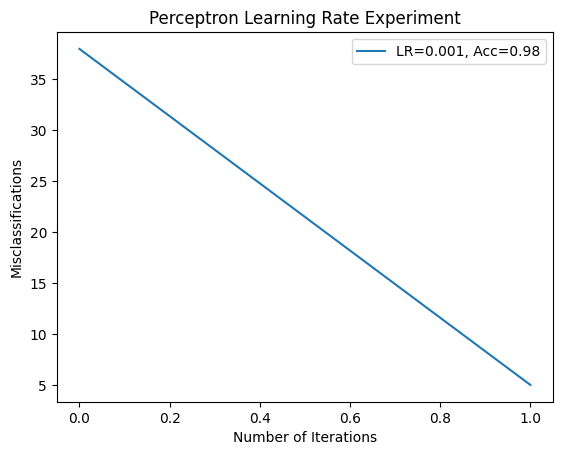

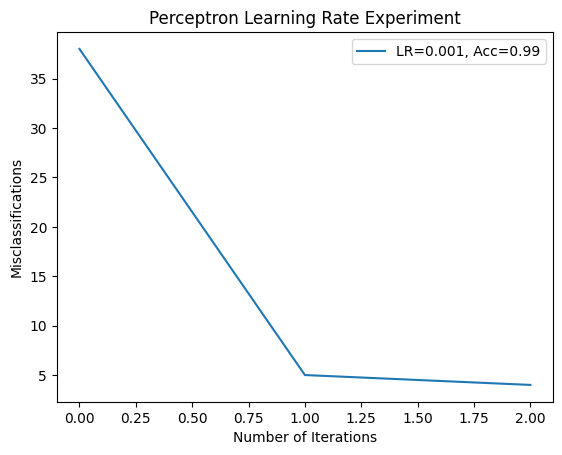

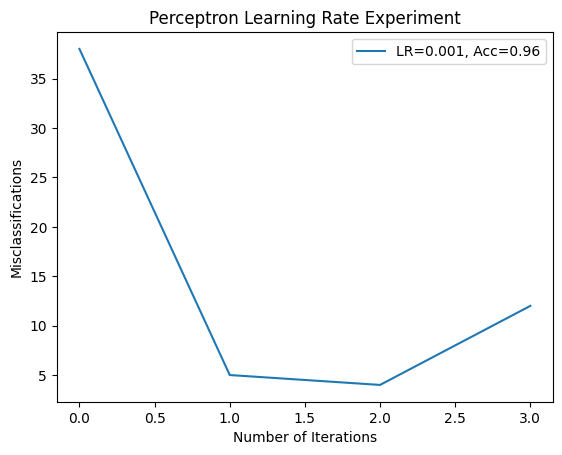

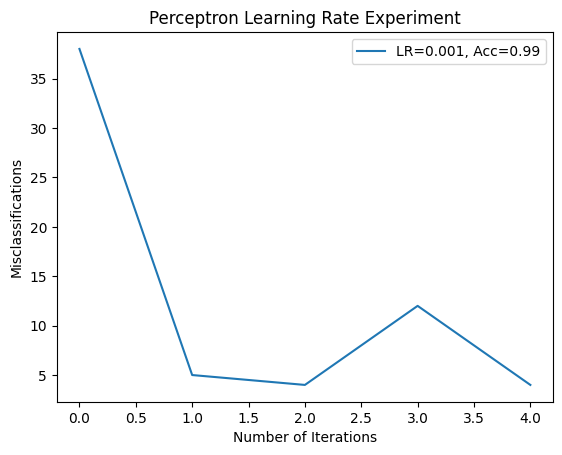

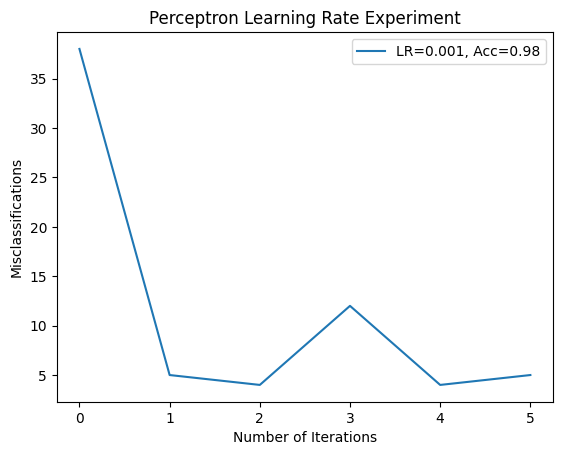

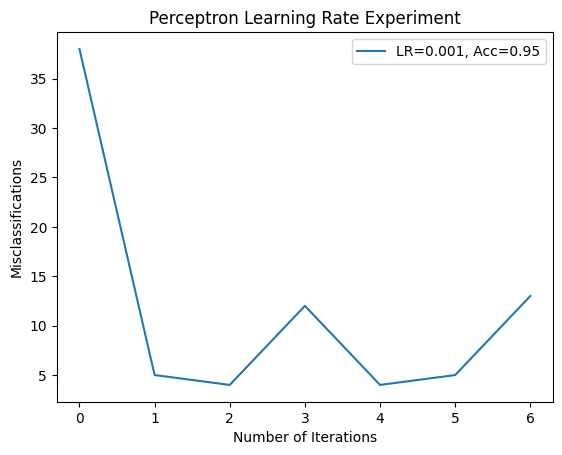

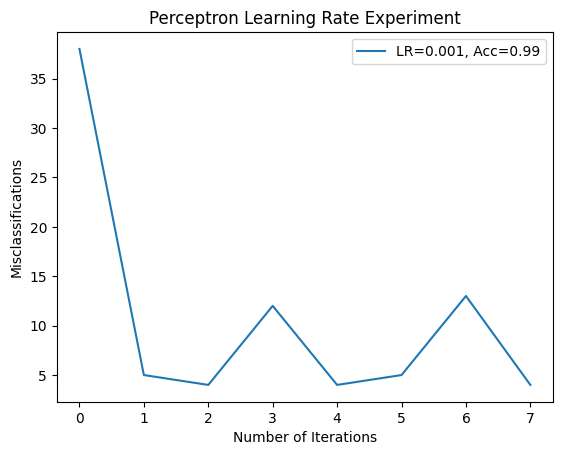

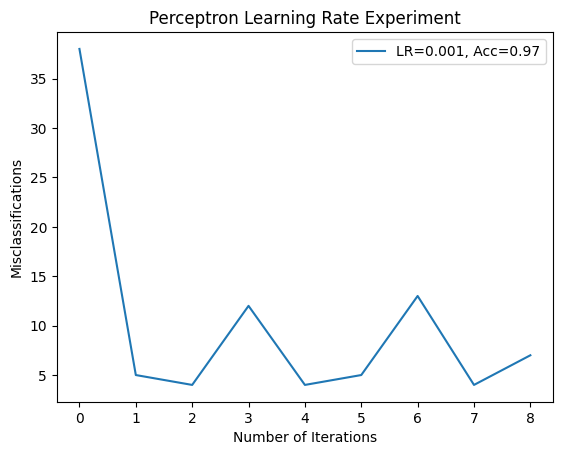

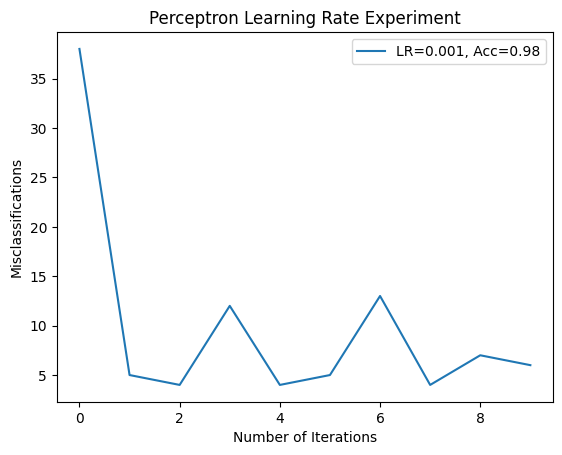

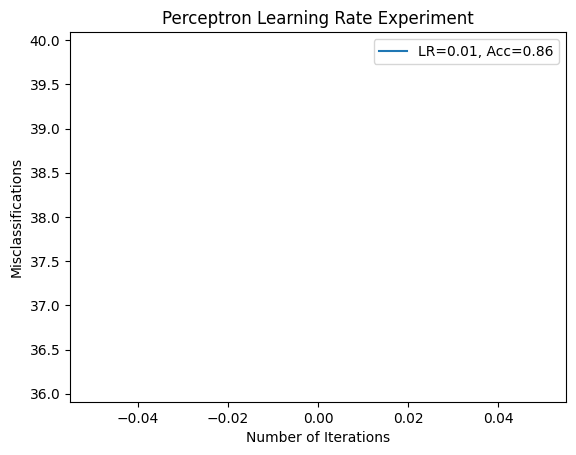

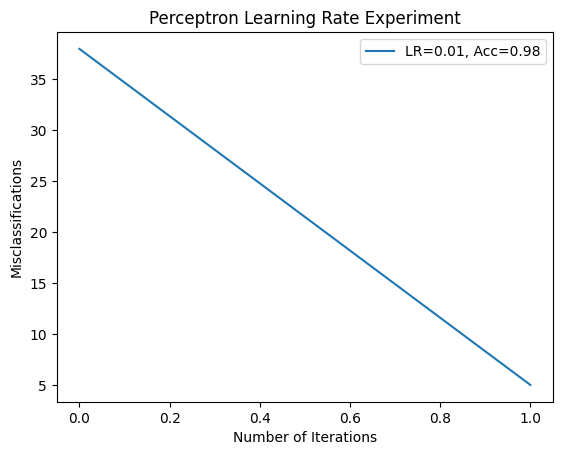

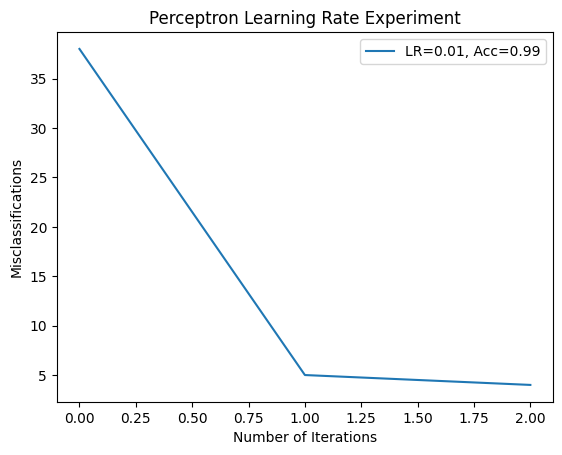

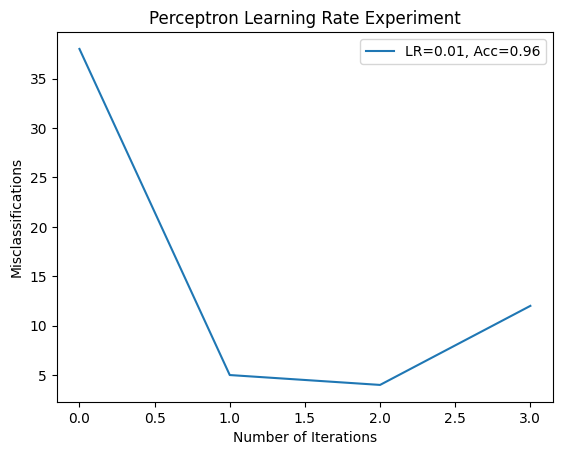

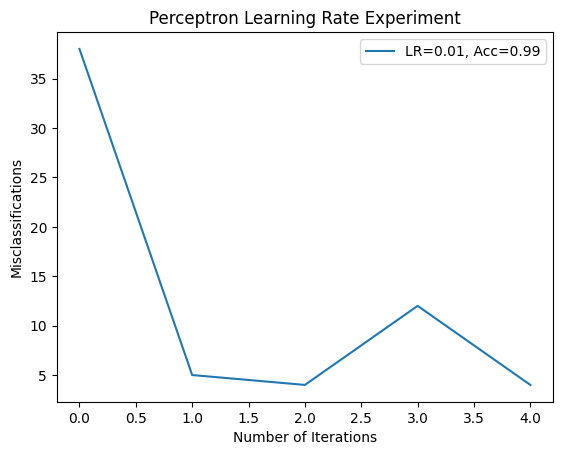

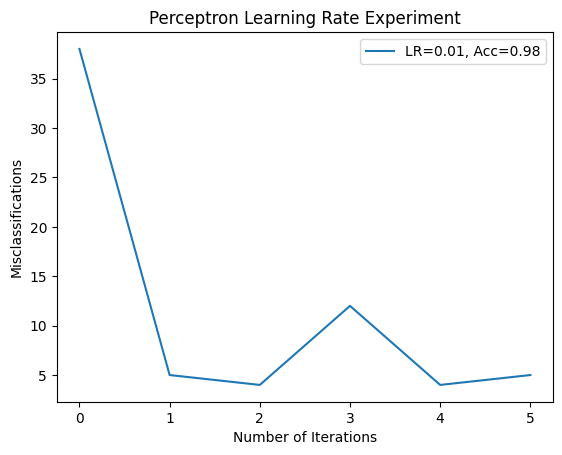

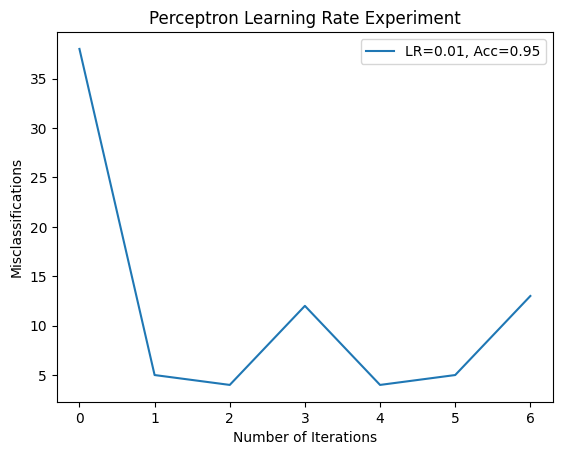

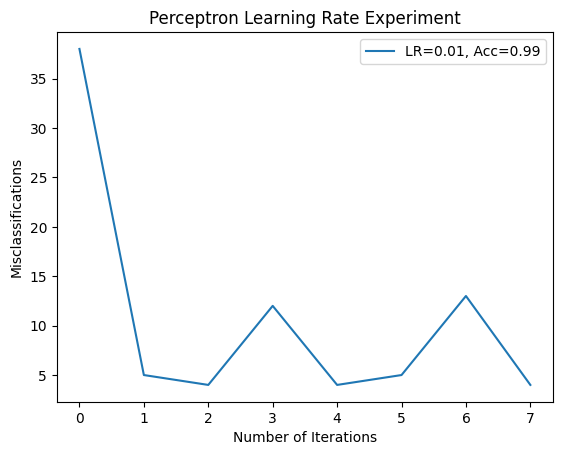

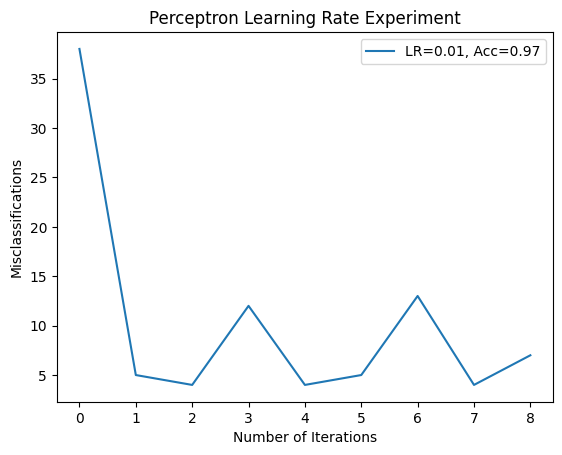

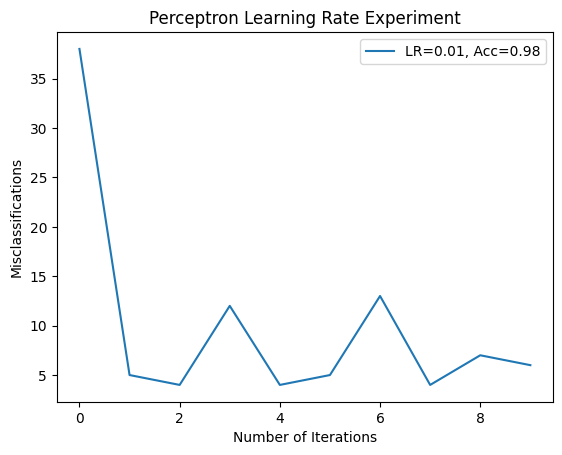

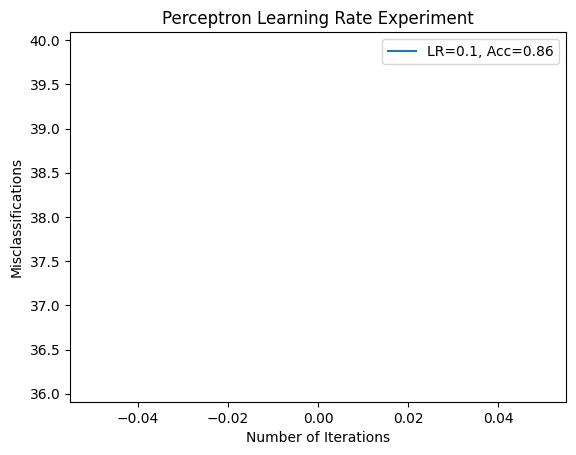

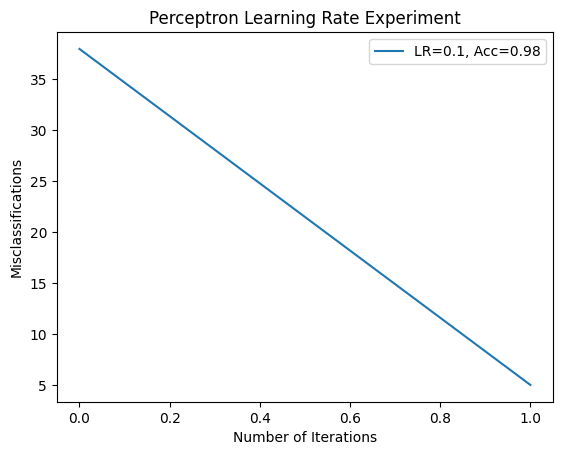

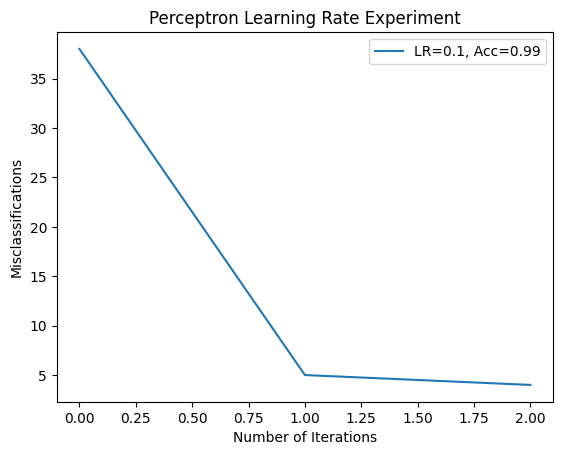

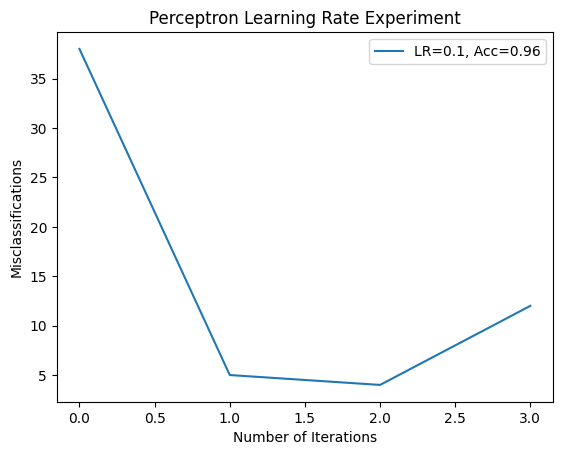

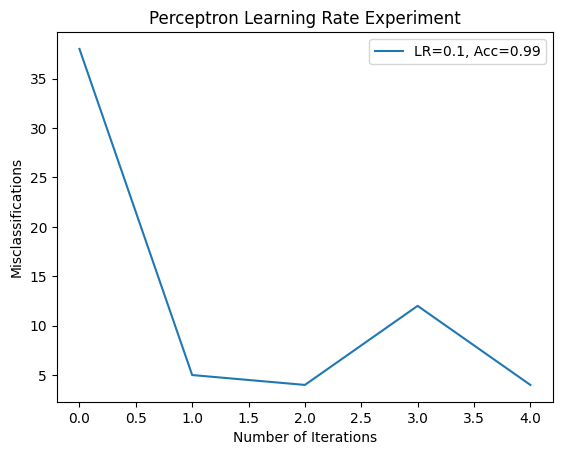

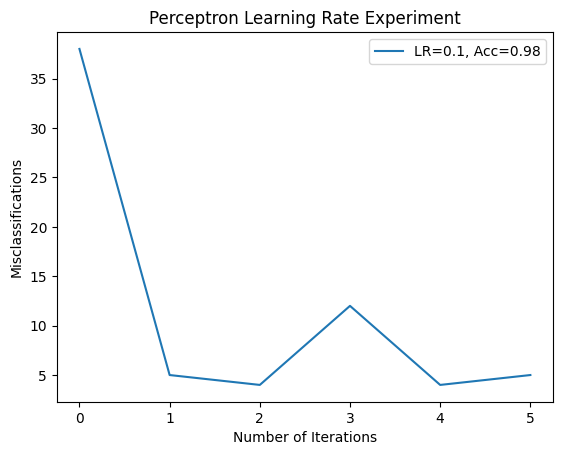

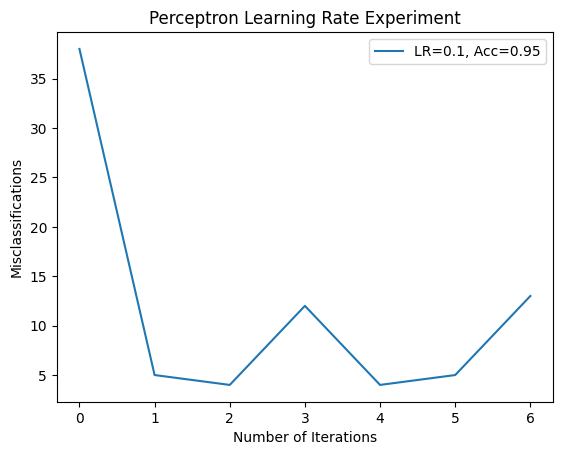

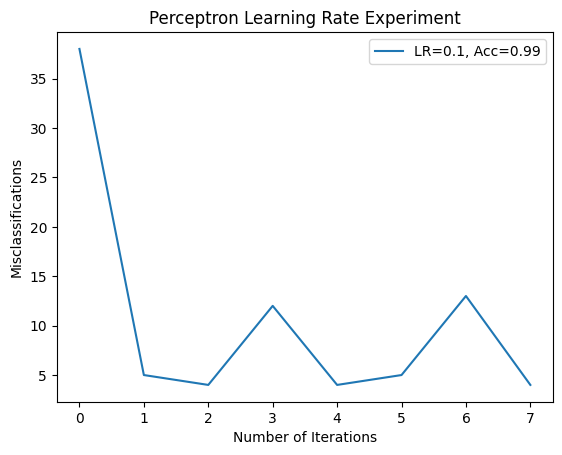

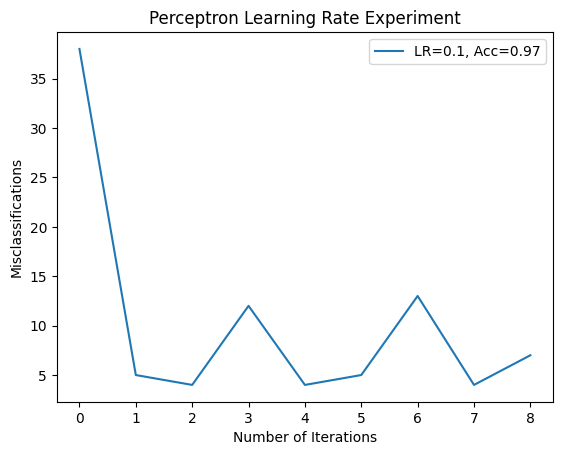

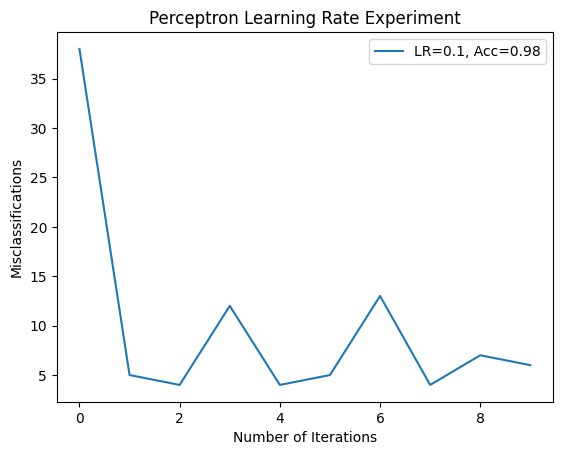

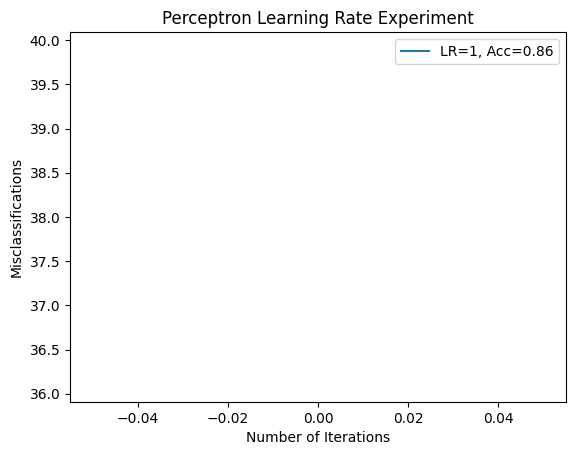

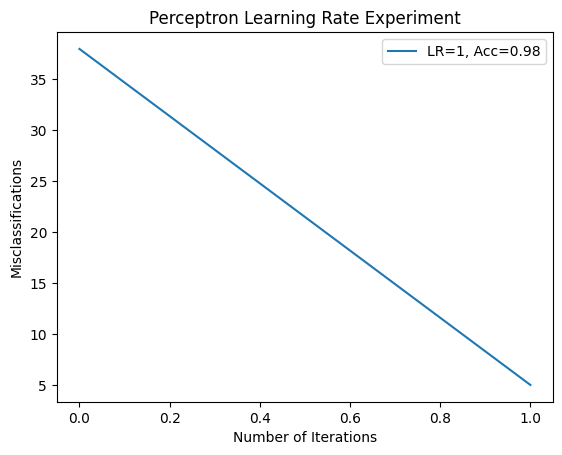

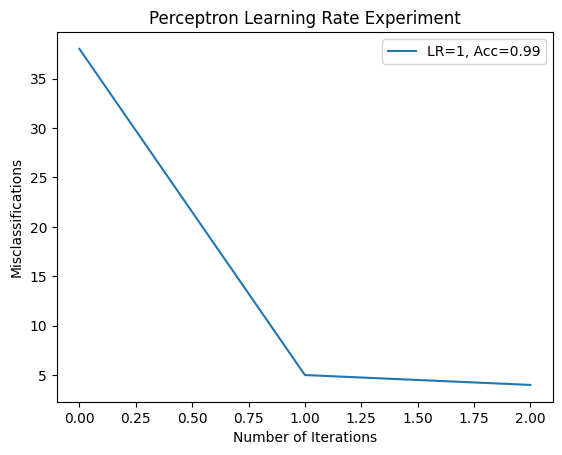

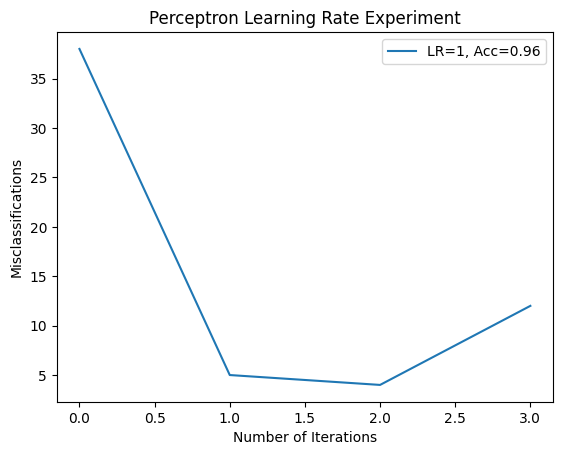

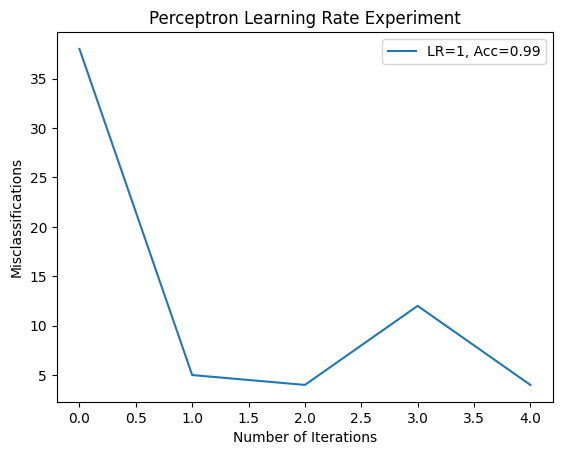

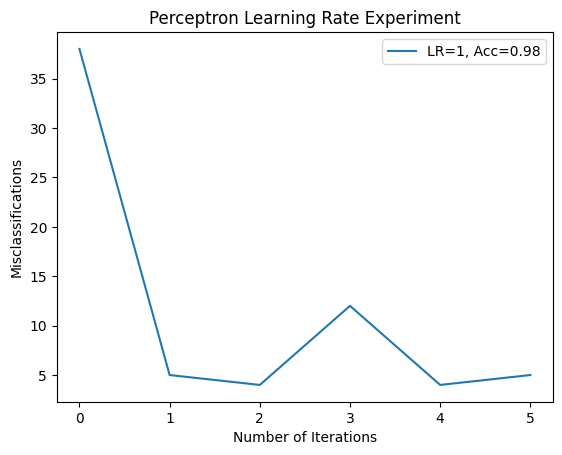

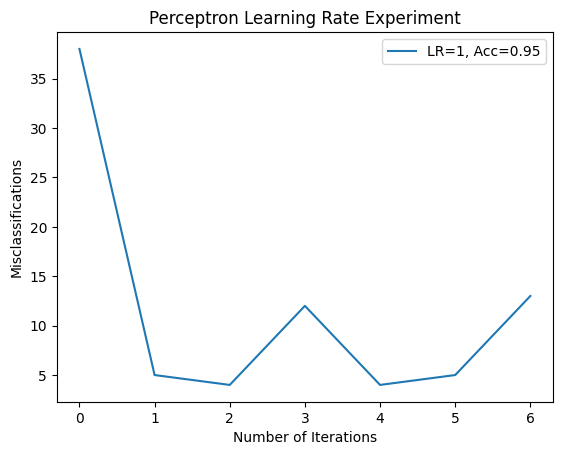

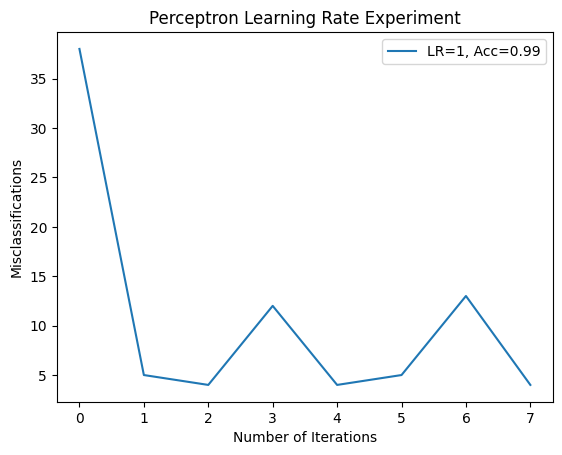

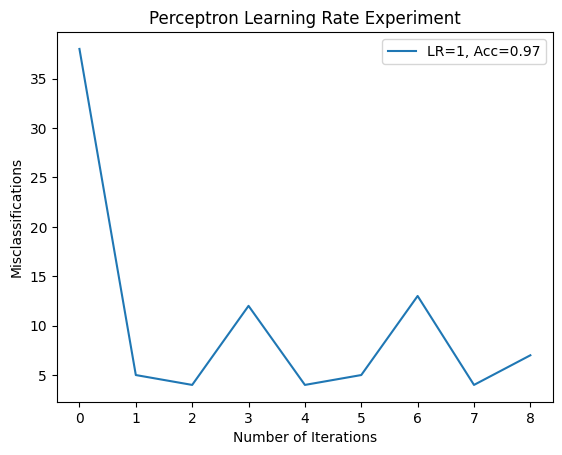

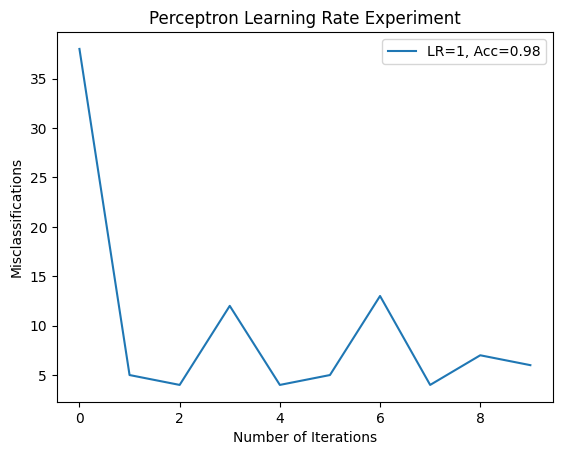

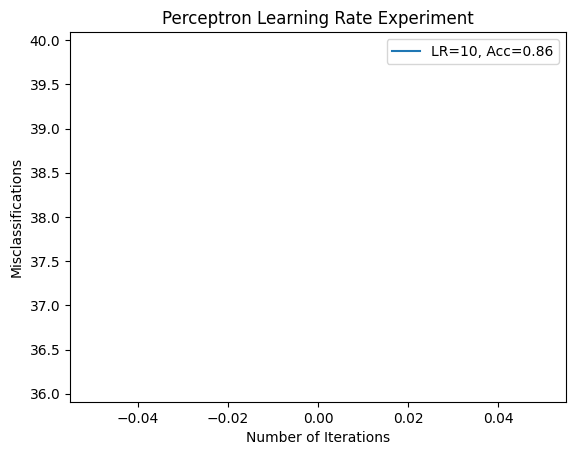

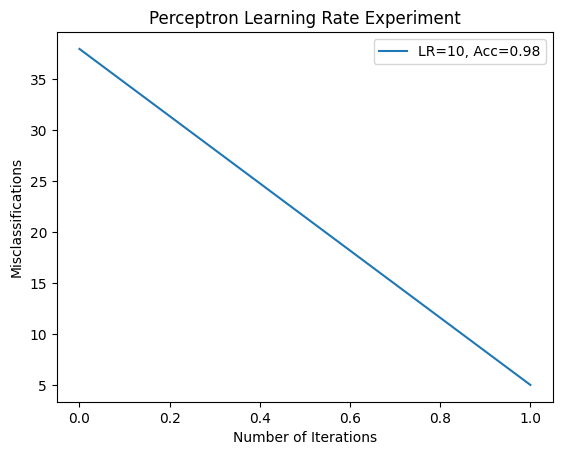

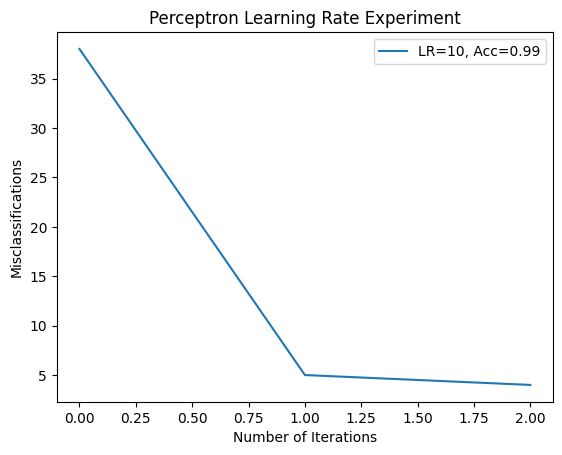

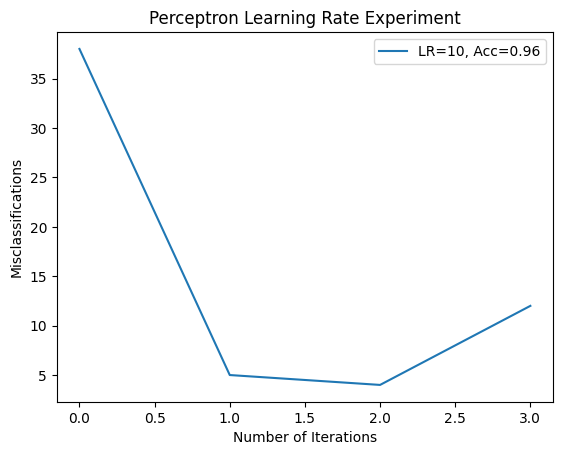

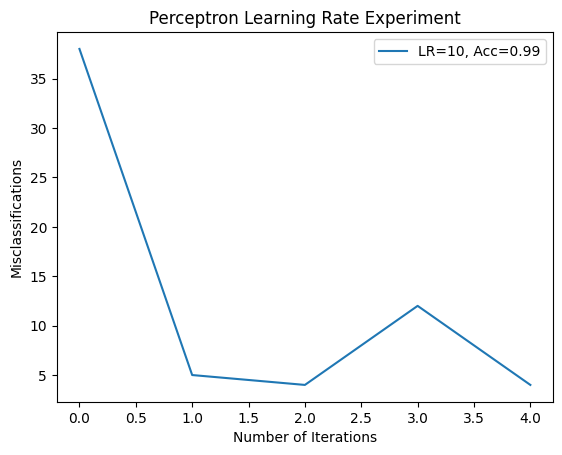

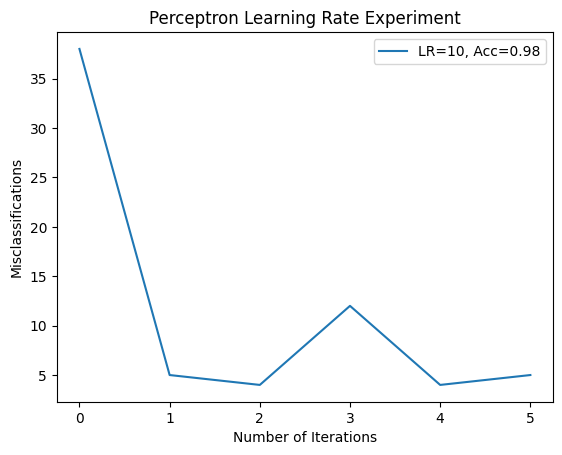

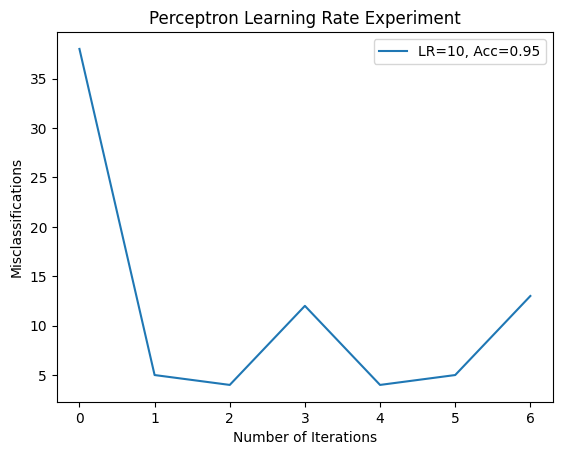

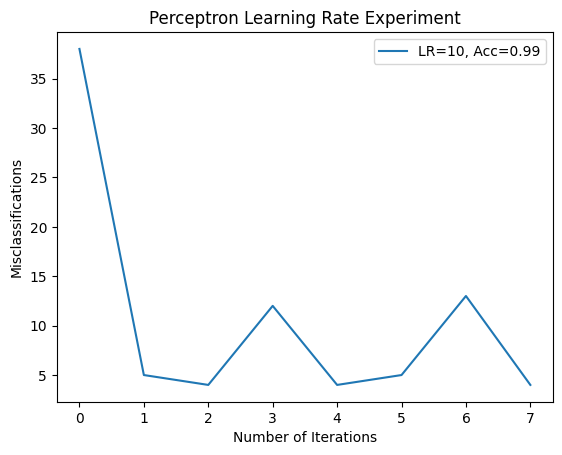

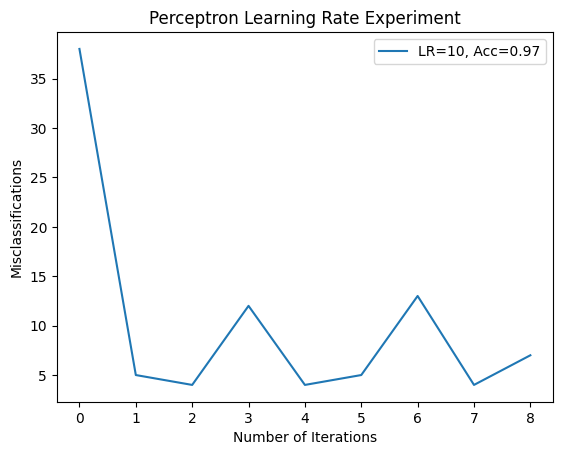

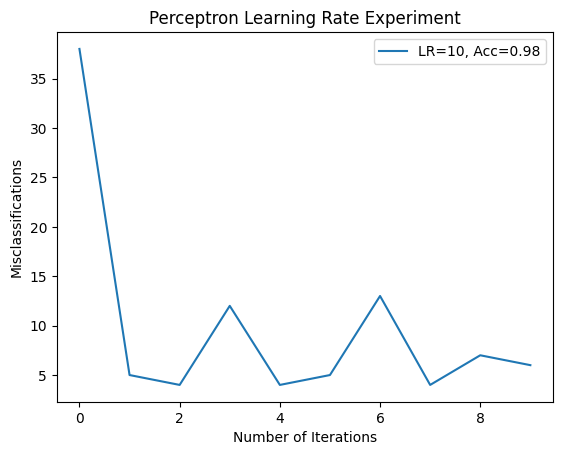

In [60]:
learning_rates = [0.001, 0.01, 0.1, 1, 10]
plot_learning_rate_experiment(learning_rates)

If the learning rate is too large, the perceptron algorithm might not converge, and the error plot may not show convergence it will diverge.

**Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. **

In [61]:
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2,
                                    n_redundant=0, n_clusters_per_class=1, flip_y=0.1, random_state=42)

In [63]:
clf = Perceptron(max_iter=1000, random_state=42)
clf.fit(X, y)

Perceptron(random_state=42)

Text(0, 0.5, 'Feature 2')

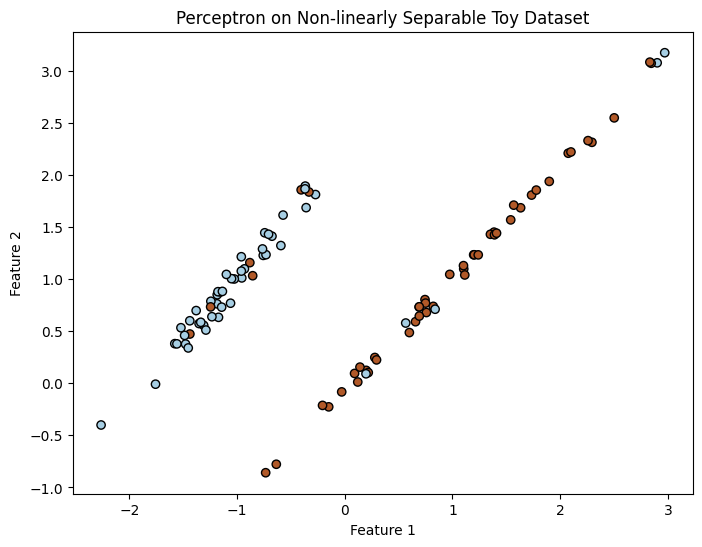

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Perceptron on Non-linearly Separable Toy Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

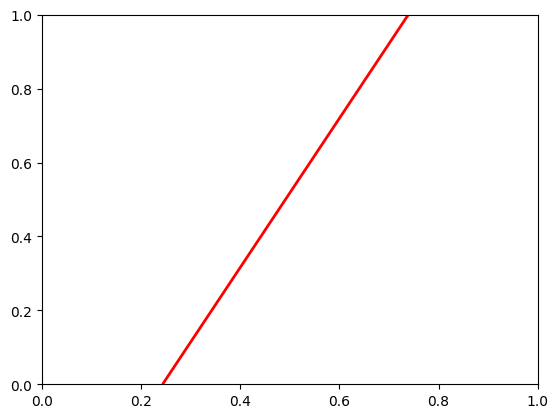

In [68]:
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[2], linewidths=2, colors='red')
plt.show()